<a href="https://colab.research.google.com/github/nahin333/DL-practice-codes/blob/main/overfitting__%26_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17158274118_00ec99a23c.jpg')]

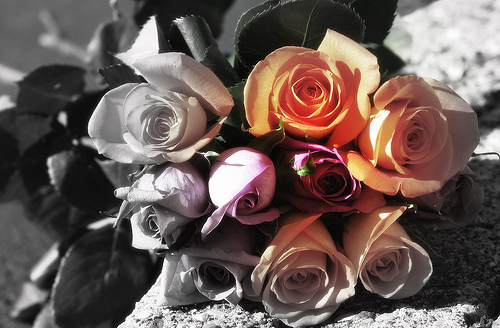

In [7]:
PIL.Image.open(str(roses[1]))

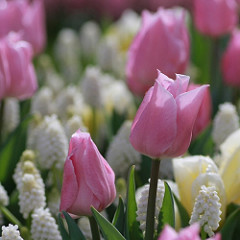

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flower_iamges_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips': 4,
}

In [11]:
str(flower_iamges_dict['roses'][0])

'datasets/flower_photos/roses/4754734410_94d98463a5.jpg'

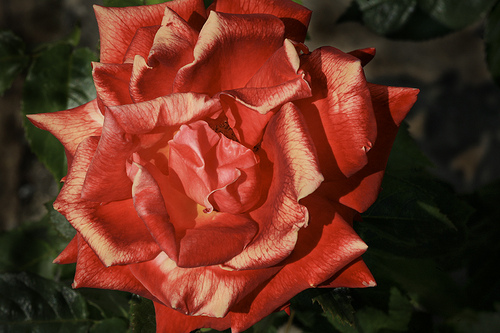

(333, 500, 3)


In [12]:
img = cv2.imread(str(flower_iamges_dict['roses'][0]))
cv2_imshow(img)
print(img.shape)

In [13]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [14]:
X, y = [],[]

for flower_name, images in flower_iamges_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [17]:
len(X_train)

2752

In [18]:
X_train[0].shape

(180, 180, 3)

In [19]:
img_height = X_train[0].shape[0]
img_width = X_train[0].shape[1]

In [20]:
X_train_scaled = X_train / 255
X_test_sacled = X_test / 255

In [21]:
X_train_scaled[:5]

array([[[[0.19215686, 0.24705882, 0.36470588],
         [0.14901961, 0.22745098, 0.3254902 ],
         [0.14117647, 0.23137255, 0.34117647],
         ...,
         [0.47843137, 0.82352941, 0.9254902 ],
         [0.50196078, 0.83529412, 0.93333333],
         [0.45490196, 0.78039216, 0.89803922]],

        [[0.20784314, 0.24705882, 0.34509804],
         [0.13333333, 0.2       , 0.2627451 ],
         [0.10588235, 0.18431373, 0.24705882],
         ...,
         [0.48627451, 0.83137255, 0.93333333],
         [0.54117647, 0.85882353, 0.94901961],
         [0.51372549, 0.81960784, 0.9254902 ]],

        [[0.20392157, 0.23137255, 0.33333333],
         [0.14117647, 0.19215686, 0.25882353],
         [0.1254902 , 0.19215686, 0.27058824],
         ...,
         [0.50980392, 0.83529412, 0.94509804],
         [0.56078431, 0.85882353, 0.95294118],
         [0.55294118, 0.84313725, 0.94901961]],

        ...,

        [[0.83921569, 0.80392157, 0.74901961],
         [0.84705882, 0.81176471, 0.75686275]

In [22]:
y_train[:5]

array([2, 0, 1, 2, 4])

##Without Image Augmentation

In [23]:
model = Sequential([
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(5)
])

In [24]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [25]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 17s 57ms/step - loss: 1.4433 - accuracy: 0.3805
Epoch 2/30
86/86 [==============================] - 5s 57ms/step - loss: 1.0201 - accuracy: 0.6054
Epoch 3/30
86/86 [==============================] - 5s 56ms/step - loss: 0.8418 - accuracy: 0.6813
Epoch 4/30
86/86 [==============================] - 5s 56ms/step - loss: 0.6721 - accuracy: 0.7515
Epoch 5/30
86/86 [==============================] - 5s 57ms/step - loss: 0.4899 - accuracy: 0.8267
Epoch 6/30
86/86 [==============================] - 5s 57ms/step - loss: 0.3710 - accuracy: 0.8666
Epoch 7/30
86/86 [==============================] - 5s 56ms/step - loss: 0.1908 - accuracy: 0.9415
Epoch 8/30
86/86 [==============================] - 5s 57ms/step - loss: 0.1114 - accuracy: 0.9688
Epoch 9/30
86/86 [==============================] - 5s 56ms/step - loss: 0.0518 - accuracy: 0.9858
Epoch 10/30
86/86 [==============================] - 5s 57ms/step - loss: 0.0535 - accuracy: 0.9884
Epoch 11

In [26]:
model.evaluate(X_test_sacled, y_test)

29/29 [==============================] - 1s 29ms/step - loss: 2.8544 - accuracy: 0.6416


[2.8544156551361084, 0.64161217212677]

In [27]:
y_predicted = model.predict(X_test_sacled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

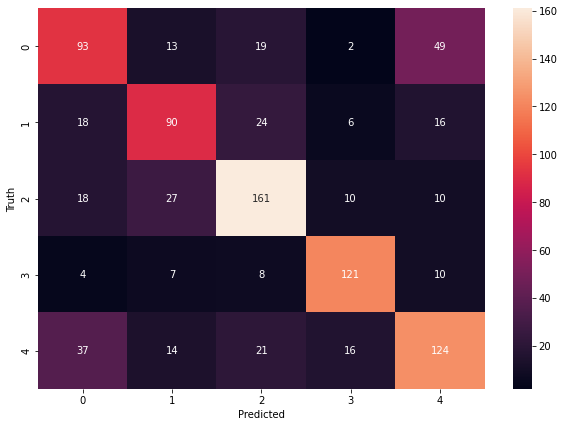

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_sacled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.53      0.54       176
           1       0.60      0.58      0.59       154
           2       0.69      0.71      0.70       226
           3       0.78      0.81      0.79       150
           4       0.59      0.58      0.59       212

    accuracy                           0.64       918
   macro avg       0.64      0.64      0.64       918
weighted avg       0.64      0.64      0.64       918



In [30]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomZoom(0.3)
])

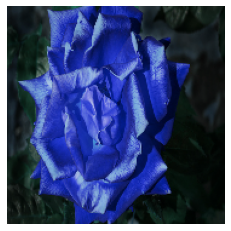

In [31]:
plt.axis('off')
plt.imshow(X[0])
#cv2_imshow(X[0])

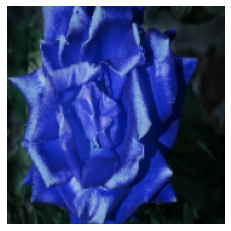

In [32]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [33]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomContrast(0.9)
])

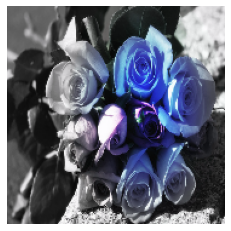

In [34]:
plt.axis('off')
plt.imshow(X[1])

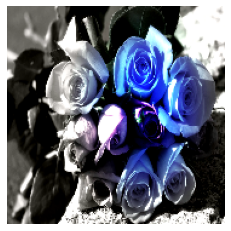

In [35]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype('uint8'))

In [36]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomRotation(0.9)
])

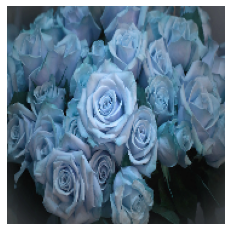

In [37]:
plt.axis('off')
plt.imshow(X[2])

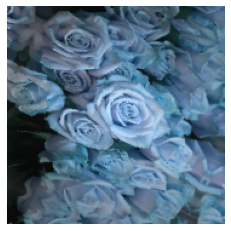

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype('uint8'))

##With Image Augmentation

In [39]:
data_augmentation = keras.Sequential([
              layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
              layers.experimental.preprocessing.RandomRotation(0.1),
              layers.experimental.preprocessing.RandomZoom(0.1),
])

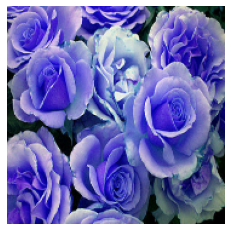

In [40]:
plt.axis('off')
plt.imshow(X[3])

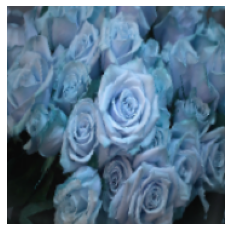

In [41]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype('uint8'))

In [42]:
model = Sequential([
          data_augmentation,
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Dropout(0.2),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(5)
])

In [43]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [44]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 65ms/step - loss: 1.3706 - accuracy: 0.4157
Epoch 2/30
86/86 [==============================] - 5s 64ms/step - loss: 1.0295 - accuracy: 0.5952
Epoch 3/30
86/86 [==============================] - 6s 64ms/step - loss: 0.9540 - accuracy: 0.6195
Epoch 4/30
86/86 [==============================] - 6s 65ms/step - loss: 0.8708 - accuracy: 0.6730
Epoch 5/30
86/86 [==============================] - 6s 64ms/step - loss: 0.8762 - accuracy: 0.6599
Epoch 6/30
86/86 [==============================] - 6s 65ms/step - loss: 0.7989 - accuracy: 0.7002
Epoch 7/30
86/86 [==============================] - 6s 65ms/step - loss: 0.7484 - accuracy: 0.7184
Epoch 8/30
86/86 [==============================] - 6s 64ms/step - loss: 0.7251 - accuracy: 0.7209
Epoch 9/30
86/86 [==============================] - 6s 65ms/step - loss: 0.6872 - accuracy: 0.7369
Epoch 10/30
86/86 [==============================] - 6s 65ms/step - loss: 0.6482 - accuracy: 0.7580
Epoch 11/

In [45]:
model.evaluate(X_test_sacled, y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.9187 - accuracy: 0.7309


[0.9186707139015198, 0.7309368252754211]

In [46]:
y_predicted = model.predict(X_test_sacled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

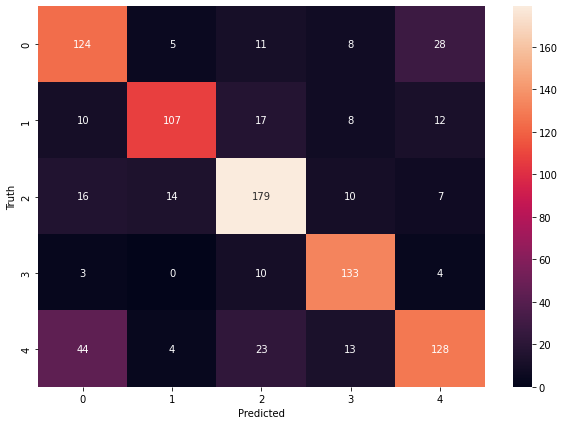

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_sacled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.70      0.66       176
           1       0.82      0.69      0.75       154
           2       0.75      0.79      0.77       226
           3       0.77      0.89      0.83       150
           4       0.72      0.60      0.65       212

    accuracy                           0.73       918
   macro avg       0.74      0.74      0.73       918
weighted avg       0.73      0.73      0.73       918

